In [41]:
from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [22]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# X = X[np.logical_or(y == 1, y == 0)]
# y = y[np.logical_or(y == 1, y == 0)]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [24]:
# scale the features
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
X_train_std.shape


(105, 2)

In [26]:
ppn = Perceptron(eta0=0.12, random_state=1)
ppn.n_iter_ = 40
print(ppn.n_iter_)
ppn.fit(X_train_std, y_train)
print(ppn.n_iter_)

40
13


In [29]:
y_pred = ppn.predict(X_test_std)

In [30]:
(y_test != y_pred).sum()

3

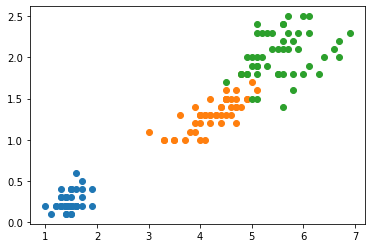

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [40]:
acc_score = accuracy_score(y_pred, y_test)
print("accuracy: %.2f" % acc_score)

accuracy: 0.93


In [50]:
A = np.arange(1, 5, 1)
B = np.arange(1, 10, 1)
x1, x2 = np.meshgrid(A, B)
print(x1.ravel())
print(x2.ravel())

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 9 9 9 9]


In [62]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z,  alpha = 0.2, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\mexak\Anaconda3\envs\auto_ml\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


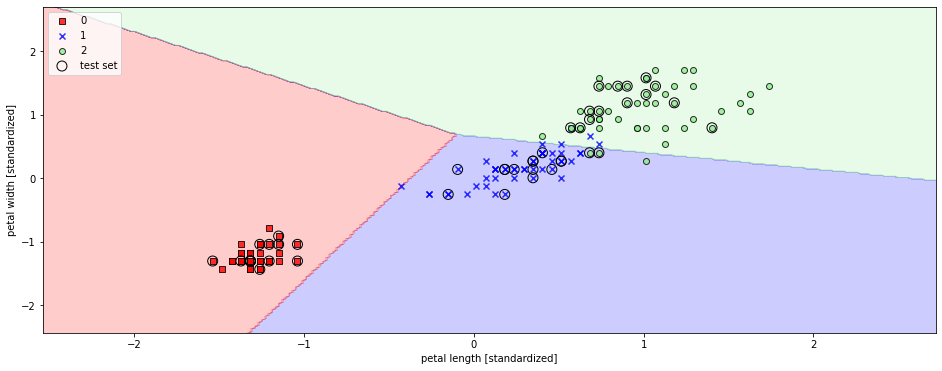

In [63]:

fig, ax = plt.subplots(1, 1, figsize = (16, 6))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')